<a href="https://colab.research.google.com/github/iamsuhrob/iamsuhrob/blob/main/heart_competiotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn import metrics

In [12]:
data = pd.read_csv('/content/heart.csv')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [14]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
data.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [17]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [26]:
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns

In [27]:
corr = data.corr()

In [28]:
sns.set_theme(style="white")

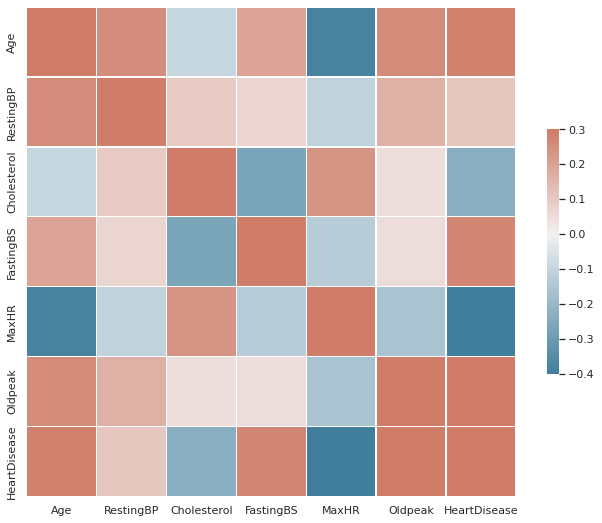

In [31]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)



sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

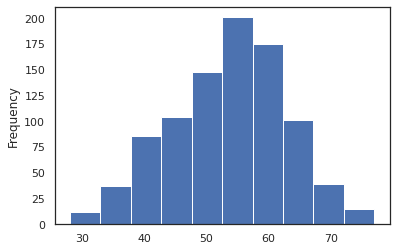

In [32]:
data.Age.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88cad732d0>,
      dtype=object)

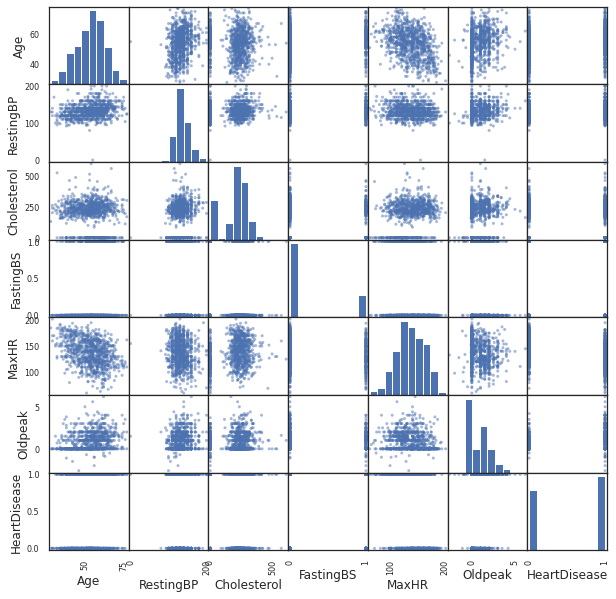

In [41]:
scatter_matrix(data, figsize=(10, 10))

In [33]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [34]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [35]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [38]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [71]:
to_num = pd.get_dummies(data[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']], drop_first=True)

In [74]:
df = pd.concat([data, to_num], axis=1, join="inner")

In [75]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,0,0,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,0,1,0,1,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,0,0,1,1,0,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1,0,0,0,1,0,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1,0,0,0,1,0,1,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0,1,0,0,0,0,0,1,0


In [77]:
df.drop(labels=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], axis=1, inplace=True)

In [78]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [80]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
y_train

155    1
362    1
869    0
101    0
199    0
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 688, dtype: int64

In [92]:
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
rd = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=5)
grd = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200)
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
catb = CatBoostClassifier()
xgb = XGBClassifier(max_depth=5, n_estimators=200, n_jobs=2, learning_rate=0.1)

In [93]:
def access_model(model, name='Default'):
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  preds_proba = model.predict_proba(X_test)
  print("      ", name, '\n', classification_report(y_test, preds))
  cnf = confusion_matrix(y_test, preds)

In [94]:
access_model(log_reg, 'LogisticRegression')
access_model(dt, 'DecisionTree')
access_model(rd, 'RandomForest')
access_model(grd, 'GradientBoosting')
access_model(ada, 'AdaBoosting')
access_model(catb, 'CatBoost')
access_model(xgb, 'XGB')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



       LogisticRegression 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        98
           1       0.89      0.86      0.87       132

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.85       230
weighted avg       0.86      0.86      0.86       230

       DecisionTree 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        98
           1       0.85      0.80      0.82       132

    accuracy                           0.80       230
   macro avg       0.80      0.81      0.80       230
weighted avg       0.81      0.80      0.81       230

       RandomForest 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        98
           1       0.87      0.90      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
we

log_reg = LogisticRegression()
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
rd = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=5)
grd = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200)
ada = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
catb = CatBoostClassifier()
xgb

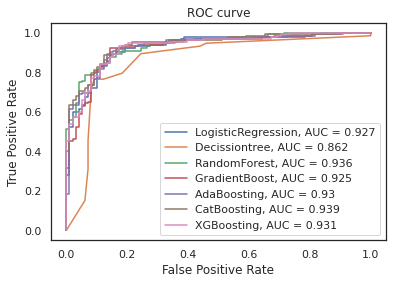

In [99]:
#logisticregression
preds_proba_log = log_reg.predict_proba(X_test)
probslog = preds_proba_log[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probslog)
auclog = metrics.roc_auc_score(y_test, probslog)
plt.plot(fpr, tpr, label=f'LogisticRegression, AUC = {str(round(auclog, 3))}')

#Decissiontree
preds_proba_dt = dt.predict_proba(X_test)
probsdt = preds_proba_dt[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsdt)
aucdt = metrics.roc_auc_score(y_test, probsdt)
plt.plot(fpr, tpr, label=f'Decissiontree, AUC = {str(round(aucdt, 3))}')

#RandomForest
preds_proba_rd = rd.predict_proba(X_test)
probsrd = preds_proba_rd[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsrd)
aucrd = metrics.roc_auc_score(y_test, probsrd)
plt.plot(fpr, tpr, label=f'RandomForest, AUC = {str(round(aucrd, 3))}')

#GradientBoost
preds_proba_grd = grd.predict_proba(X_test)
probsgrd = preds_proba_grd[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsgrd)
aucgrd = metrics.roc_auc_score(y_test, probsgrd)
plt.plot(fpr, tpr, label=f'GradientBoost, AUC = {str(round(aucgrd, 3))}')

#AdaBoosting
preds_proba_ada = ada.predict_proba(X_test)
probsada = preds_proba_ada[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsada)
aucada = metrics.roc_auc_score(y_test, probsada)
plt.plot(fpr, tpr, label=f'AdaBoosting, AUC = {str(round(aucada, 3))}')


#Catboosting
preds_proba_catb = catb.predict_proba(X_test)
probscatb = preds_proba_catb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probscatb)
auccatb = metrics.roc_auc_score(y_test, probscatb)
plt.plot(fpr, tpr, label=f'CatBoosting, AUC = {str(round(auccatb, 3))}')

#XGB
preds_proba_xgb = xgb.predict_proba(X_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsxgb)
aucxgb = metrics.roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoosting, AUC = {str(round(aucxgb, 3))}')



plt.ylabel("True Positive Rate")
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.rcParams['axes.titlesize']=18
plt.legend()
plt.show()